# Quiz 1

**Profesor**: Saúl Calderón Ramírez

**Estudiante**:

* Gabriel Valentine


## 1. Datos

Su equipo de ciencias de datos debe reportar los resultados de un modelo de estimación ósea a un cliente. Para reportarlo de forma que el cliente entienda que el valor esperado del error en meses del modelo es estocástico, su equipo decide reportar tal resultado usando intervalos de confianza. Para ello, su equipo utilizó bootsrapping con R = 53 repeticiones de muestras de n = 53 para calcular las 53 medias muestrales que a continuacion se detallan:

In [2]:
import numpy as np

sample_means = np.array([1.230, 1.330, 0.040, 0.044, 1.200, 0.270, 0.490, 0.190, 0.830, 0.810, 0.710, 0.560,
                         0.490, 1.160, 0.050, 0.150, 0.195, 0.770, 1.080, 0.980, 0.630, 0.560, 0.410, 0.730,
                         0.590, 0.340, 0.340, 0.840, 0.500, 0.340, 0.280, 0.340, 0.750, 0.870, 0.560, 0.170,
                         0.180, 0.190, 0.040, 0.490, 1.100, 0.160, 0.100, 0.210, 0.860, 0.520, 0.650, 0.270,
                         0.940, 0.400, 0.460, 0.260, 0.270])


## 1.1

(10 puntos) Calcule las estimaciones de la media y desviacion estandar poblacionales x y s, uti- lizando las funciones adecuadas en pytorch.


In [3]:
import torch

datos = torch.tensor(sample_means, dtype=torch.float32)

#media poblacional y desviación estándar poblacional
mean_population = torch.mean(datos)
std_population = torch.std(datos, unbiased=False)

print(f"Media poblacional: {mean_population}")
print(f"Desviación estándar poblacional: {std_population}")


Media poblacional: 0.5269622206687927
Desviación estándar poblacional: 0.34496191143989563


## 1.2

(30 puntos) Grafique la función de densidad normal estandarizada (en Python u Octave), e iden- tifique en tal grafica, usando la regla de los 3 sigma, los puntos criticos para formar el intervalo que alcanza el 0.9973 de la funcion de densidad normalizada.


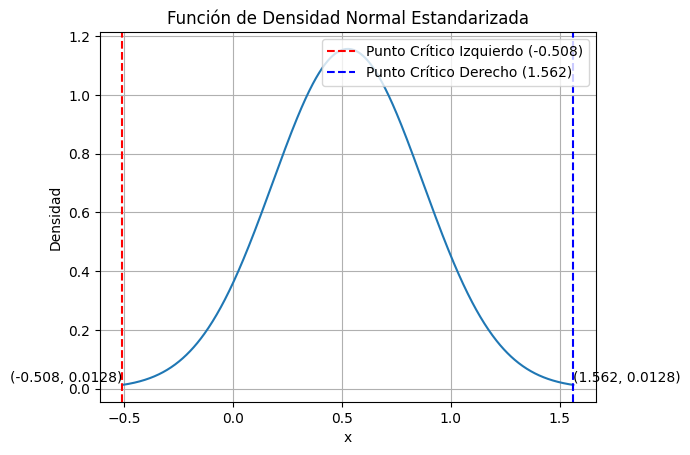

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


#calculo de los puntos críticos
x_critico_izq = norm.ppf(0.00135, loc=mean_population, scale=std_population)
x_critico_der = norm.ppf(1 - 0.00135, loc=mean_population, scale=std_population)
x = np.linspace(x_critico_izq, x_critico_der, 1000)

#funcion de densidad normal estandarizada
y = norm.pdf(x, mean_population, std_population)

#grafico de la funcion y sus puntos
plt.plot(x, y)

plt.axvline(x_critico_izq, color='red', linestyle='--', label=f'Punto Crítico Izquierdo ({x_critico_izq:.3f})')
plt.axvline(x_critico_der, color='blue', linestyle='--', label=f'Punto Crítico Derecho ({x_critico_der:.3f})')

plt.text(x_critico_izq, norm.pdf(x_critico_izq, mean_population, std_population), f'({x_critico_izq:.3f}, {norm.pdf(x_critico_izq, mean_population, std_population):.4f})', fontsize=10, va='bottom', ha='right')
plt.text(x_critico_der, norm.pdf(x_critico_der, mean_population, std_population), f'({x_critico_der:.3f}, {norm.pdf(x_critico_der, mean_population, std_population):.4f})', fontsize=10, va='bottom', ha='left')

plt.legend(loc='upper right')
plt.title('Función de Densidad Normal Estandarizada')
plt.xlabel('x')
plt.ylabel('Densidad')

plt.grid(True)

plt.show()





## 1.3
(20 puntos) Utilizando la información anterior, calcule el intervalo, con una confianza de 99.73% donde se puede encontrar la media muestral del error en meses del sistema propuesto. Dado que usted cuenta con una cantidad suficiente de observaciones, puede utililizar la funcion de densidad normal estandarizada para ello.

[-0.508, 1.562]